<a href="https://colab.research.google.com/github/Priyo-prog/Statistics-and-Data-Science/blob/main/Characterising/mean_median_mode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Central Tendency of Data**

## Import Libraries and Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

## Load Data Set

In [2]:
## mount the google drive to fetch the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
filename = '/content/drive/MyDrive/Data Science/Statistical Analysis/dataset.txt'

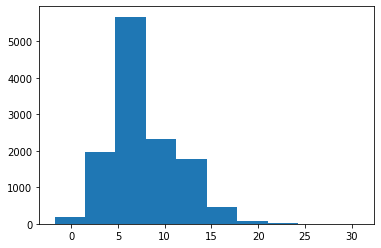

In [4]:
data = np.loadtxt(filename)
plt.hist(data);

## Mean

In [5]:
def get_mean(xs):
  summed = 0
  for x in xs:
    summed += x
  return summed / len(xs)  

In [6]:
print(get_mean([3,5,2,6]))

4.0


In [7]:
mean = np.mean(data)
print(mean, data.mean(), np.average(data))

7.68805056 7.68805056 7.68805056


## Median

Sort all your data and take out the middle element.That's your median.

In [8]:
def get_median(xs):
  mid = len(xs) // 2
  if len(xs) % 2 == 1:
    return sorted(xs)[mid]
  else:
    return 0.5 * np.sum(sorted(xs)[mid - 1:mid + 1])  

In [9]:
print(get_median([7,7,3,1,4,5]))

4.5


In [10]:
median = np.median(data)
print(median)

6.7325


Means are sensitive to outliers but medians are not sensitive to outliers

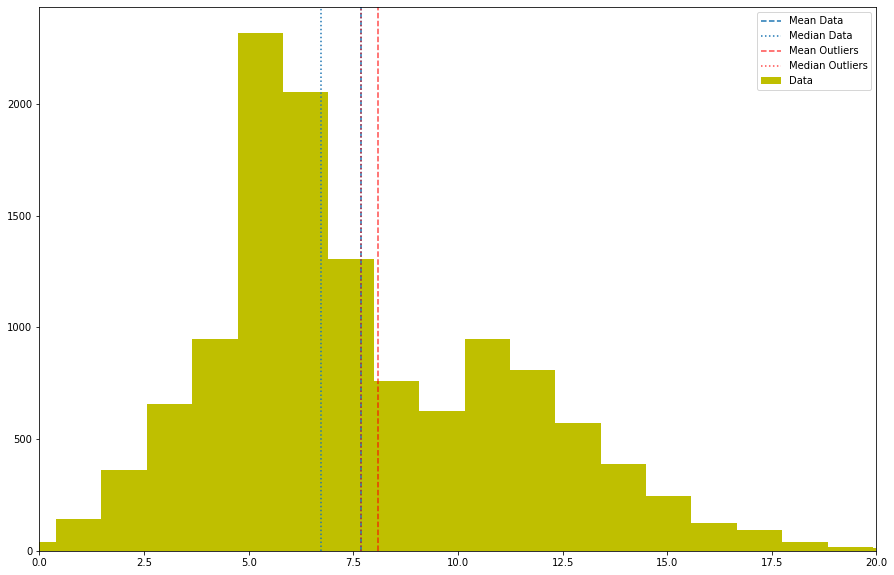

In [11]:
outliers = np.insert(data, 0, 5000)

fig, ax = plt.subplots(figsize=(15,10))
plt.hist(data, label="Data", bins=30, color='y')
plt.axvline(np.mean(data), ls="--", label="Mean Data")
plt.axvline(np.median(data), ls=":", label="Median Data")
plt.axvline(np.mean(outliers), c="r", ls="--", label="Mean Outliers", alpha=0.7)
plt.axvline(np.mean(data), c="r", ls=":", label="Median Outliers", alpha=0.7)
plt.legend()
plt.xlim(0,20);

## Mode

Another outlier insensitive method, it returns us the value which is most common.

In [12]:
def get_mode(xs):
  values, counts = np.unique(xs, return_counts=True)
  max_count_index = np.argmax(counts)
  return values[max_count_index]

In [13]:
print(get_mode([1,7,2,5,3,3,8,3,2]))

3


In [14]:
mode = st.mode(data)
print(mode)

ModeResult(mode=array([5.519]), count=array([9]))


In [15]:
hist, edges = np.histogram(data, bins=100)
edge_centers = 0.5 * (edges[1:] + edges[:-1])
mode = edge_centers[hist.argmax()]
print(mode)

5.223165


## **KDE Plot**

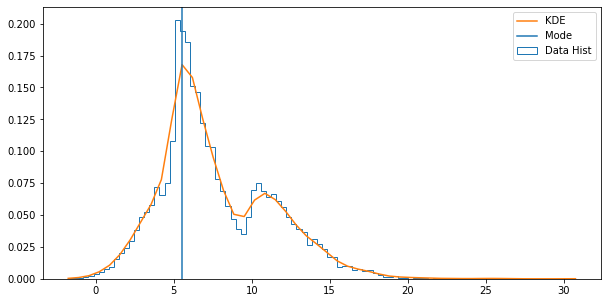

In [18]:
kde = st.gaussian_kde(data)
xvals = np.linspace(data.min(), data.max())
yvals = kde(xvals)
mode = xvals[yvals.argmax()]
fig, ax = plt.subplots(figsize=(10,5))
plt.hist(data, bins=100, density=True, label="Data Hist", histtype="step")
plt.plot(xvals, yvals, label="KDE")
plt.axvline(mode, label="Mode")
plt.legend();

## **Comparison**

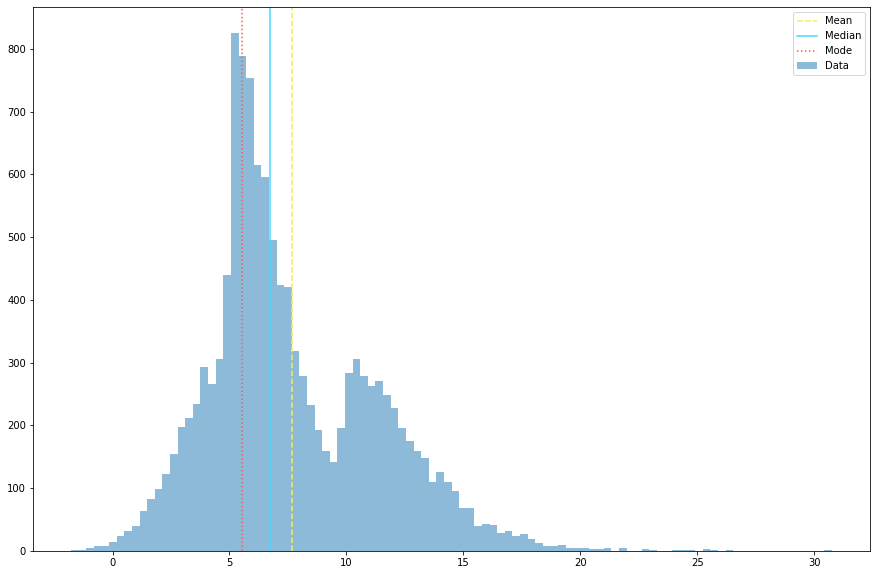

In [21]:
fig, ax = plt.subplots(figsize=(15,10))
plt.hist(data, bins=100, label="Data", alpha=0.5)
plt.axvline(mean, label="Mean", ls="--", c="#f9ee4a")
plt.axvline(median, label="Median", ls="-", c="#44d9ff")
plt.axvline(mode, label="Mode", ls=":", c="#f95b4a")
plt.legend();